In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('Processed_tweets')

In [3]:
df.head()

,Text,Sentiments
0,plz help karo plz one helping save us plz save...,neutral
1,lawyers file false cases innocent indian men a...,positive
2,indias recovery rate corona virus almost 99 URL,neutral
3,please help amplify needy lucknow supplying ho...,neutral
4,actual story behind corona vaccination many pa...,positive


In [4]:
TF_IDF = TfidfVectorizer().fit_transform(df['Text'])
#this will vectorize the text

In [5]:
TF_IDF.toarray().shape

(1001, 2883)

In [6]:
vector_df = pd.DataFrame(TF_IDF.toarray())     
#coped vectorized array into dataframe vector_df

In [7]:
#vector_df['Sentiments'] = LabelEncoder().fit_transform(df['Sentiments'])
vector_df['Sentiments'] = df['Sentiments']

In [8]:
# we encoded output in numbers 0,1,2 for positive,negative and neutral sentiment
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2874,2875,2876,2877,2878,2879,2880,2881,2882,Sentiments
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [9]:
X = vector_df.drop('Sentiments',axis=1)
Y = vector_df['Sentiments']

In [40]:
#test set of 20% data and train set contain 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [41]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882
335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.svm import SVC

In [43]:
from sklearn.metrics import classification_report

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [79]:
#SVM
model_svm = SVC()

In [80]:
model_svm.fit(X_train, Y_train)
model_svm.score(X_test, Y_test)
f1_score(Y_test, model_svm.predict(X_test), average='macro')
y_pred_svm = model_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       1.00      0.41      0.58        27
     neutral       0.66      1.00      0.80        96
    positive       1.00      0.58      0.73        78

    accuracy                           0.76       201
   macro avg       0.89      0.66      0.70       201
weighted avg       0.84      0.76      0.74       201



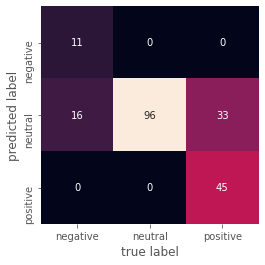

In [81]:
mat = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
model_MNB = MultinomialNB()

In [84]:
model_MNB.fit(X_train, Y_train)
model_MNB.score(X_test, Y_test)
f1_score(Y_test, model_MNB.predict(X_test), average='macro')
y_pred_MNB = model_MNB.predict(X_test)
print(classification_report(Y_test, y_pred_MNB))

              precision    recall  f1-score   support

    negative       1.00      0.04      0.07        27
     neutral       0.64      1.00      0.78        96
    positive       0.88      0.58      0.70        78

    accuracy                           0.71       201
   macro avg       0.84      0.54      0.52       201
weighted avg       0.78      0.71      0.65       201



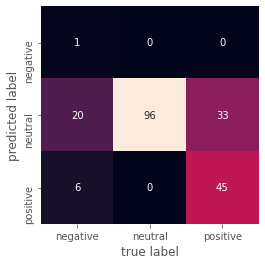

In [85]:
mat = confusion_matrix(Y_test, y_pred_MNB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.xlabel('true label')
plt.ylabel('predicted label');